<a href="https://colab.research.google.com/github/Sirczechs-Kaustubh/BodyFatPredictor/blob/main/Body_Fat_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Body Fat predictor - Regression Model

### Importing required libraries

In [ ]:
# Importing data wrangling libraries
import pandas as pd
import numpy as np

# Importing Data Visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data Pre Processing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Importing commonly used regression models
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.svm import SVR # Support Vector Regressor Model
from sklearn.linear_model import Ridge # Ridge Regressor Model
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor Model
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regressor Model

# Importing libraries for Model Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error

# Importing Pickle Library to save model weights
import pickle

### Basic data exploration

In [ ]:
df = pd.read_csv('bodyfat.csv') # reads a csv file into a pandas dataframe

In [ ]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.shape

(252, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df.describe() # Descriptive statistics

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
df.isnull().sum() # check if null values are present in the data

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [ ]:
df.duplicated().sum() # check the presence of duplicated rows

0

In [ ]:
# sets the stylesheet for the charts
plt.style.use('fivethirtyeight')
colors=['#ffcd94','#eac086','#ffad60','#ffe39f']
sns.set_palette(sns.color_palette(colors))

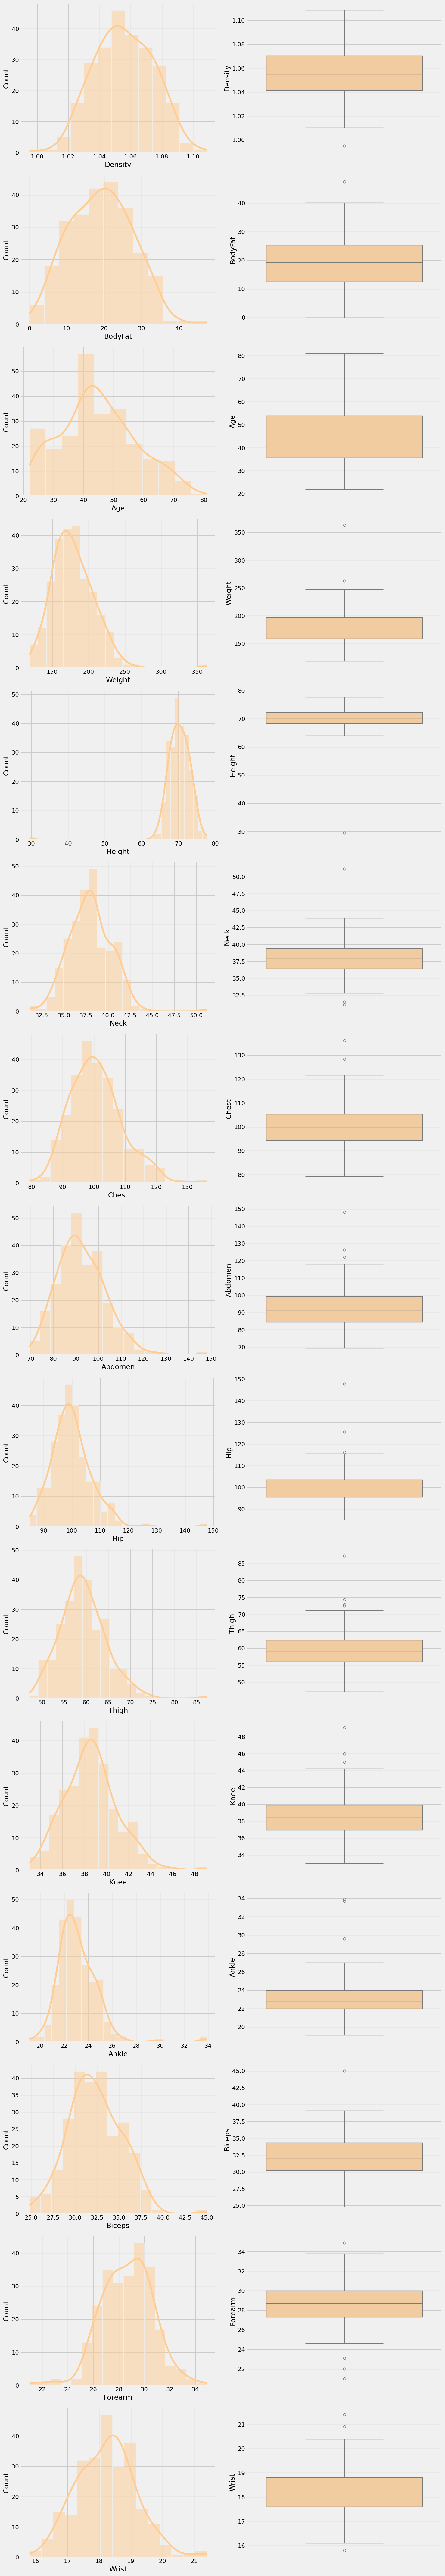

In [ ]:
# Code to plot and understand the distribution of the data

fig,ax = plt.subplots(15,2,figsize=(15,90))
for index,i in enumerate(df.columns):
    # ax[index, 0].set_xlim(avg_min, avg_max)
    # having the same scale for all the data doesnt give true character of the data
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(df[i],ax=ax[index,1])


fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [ ]:
# Observation : There are some outliers and some of the columns are skewed

Text(0.5, 1.0, 'Correlation Matrix')

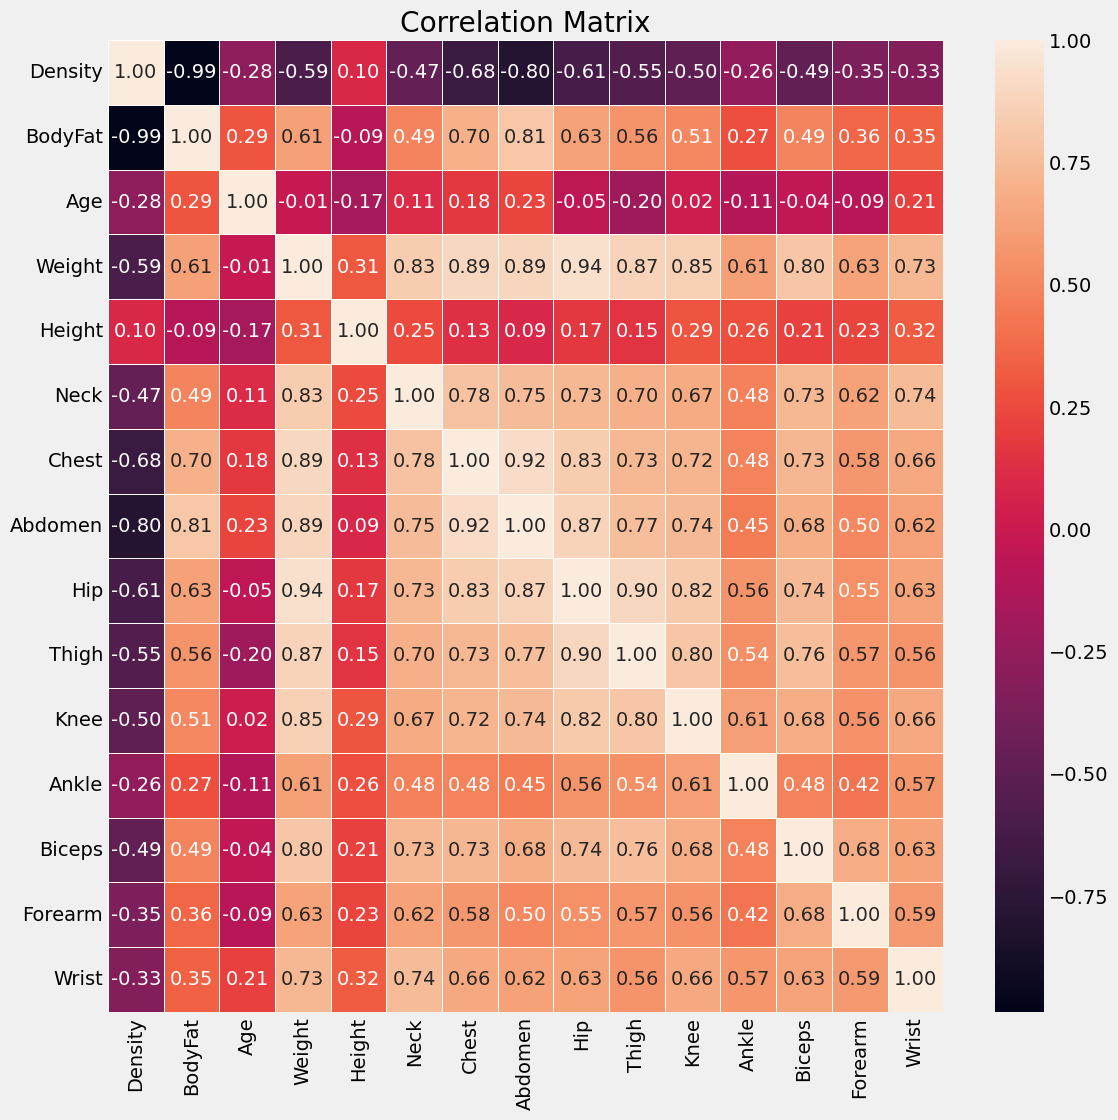

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")
plt.title("Correlation Matrix")

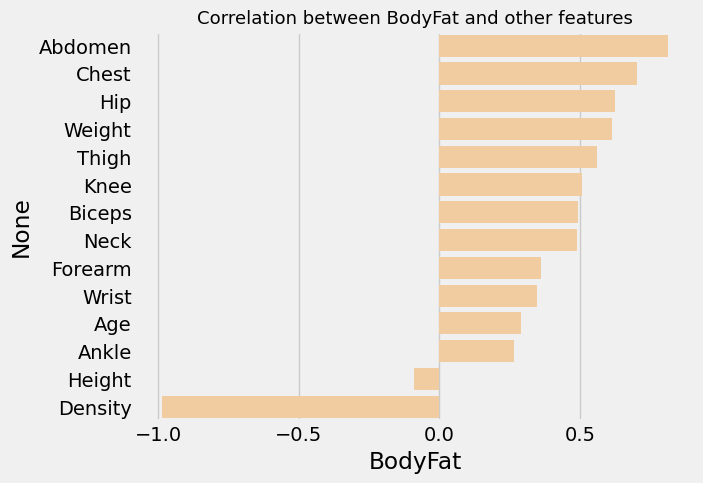

<Figure size 1200x1200 with 0 Axes>

In [ ]:
corr = df.corr()
corr = corr.BodyFat
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr,y=cr.index)

plt.xticks(np.arange(-1,1,.5))
plt.title('Correlation between BodyFat and other features',size=13)
plt.figure(figsize=(12,12))
plt.show()

## Feature Engineering

In [ ]:
# dropping features with less than 0.5 Corr

In [ ]:
data = df[["Abdomen","Chest","Hip","Weight","Thigh","Density","BodyFat"]]

In [ ]:
data.head()

,Abdomen,Chest,Hip,Weight,Thigh,Density,BodyFat
0,85.2,93.1,94.5,154.25,59.0,1.0708,12.3
1,83.0,93.6,98.7,173.25,58.7,1.0853,6.1
2,87.9,95.8,99.2,154.00,59.6,1.0414,25.3
3,86.4,101.8,101.2,184.75,60.1,1.0751,10.4
4,100.0,97.3,101.9,184.25,63.2,1.0340,28.7


## Outlier removal

In [ ]:
Q1 = data.quantile(0.25) # Establishing the Upper Limit of the distribution
Q3 = data.quantile(0.75) # Establishing the Lower Limit of the distribution
IQR = Q3 - Q1 # Calculates Inter Quantile Range for each column
print(IQR)

Abdomen    14.750
Chest      11.025
Hip         8.025
Weight     38.000
Thigh       6.350
Density     0.029
BodyFat    12.825
dtype: float64


In [ ]:
data1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
''' Creates a new dataframe where the outlier data is removed '''

' Creates a new dataframe where the outlier data is removed '

In [ ]:
data1.shape

(246, 7)

In [ ]:
X = data1.iloc[:,:-1]
y = (data1.iloc[:,-1:]).values.ravel()
rs = 430 # setting the random state for reproducibilty

In [ ]:
X.head()

,Abdomen,Chest,Hip,Weight,Thigh,Density
0,85.2,93.1,94.5,154.25,59.0,1.0708
1,83.0,93.6,98.7,173.25,58.7,1.0853
2,87.9,95.8,99.2,154.00,59.6,1.0414
3,86.4,101.8,101.2,184.75,60.1,1.0751
4,100.0,97.3,101.9,184.25,63.2,1.0340


In [ ]:
y

array([12.3,  6.1, 25.3, 10.4, 28.7, 20.9, 19.2, 12.4,  4.1, 11.7,  7.1,
        7.8, 20.8, 21.2, 22.1, 20.9, 29. , 22.9, 16. , 16.5, 19.1, 15.2,
       15.6, 17.7, 14. ,  3.7,  7.9, 22.9,  3.7,  8.8, 11.9,  5.7, 11.8,
       21.3, 40.1, 24.2, 28.4, 32.6, 32.9, 31.6, 32. ,  7.7, 13.9, 10.8,
        5.6, 13.6,  4. , 10.2,  6.6,  8. ,  6.3,  3.9, 22.6, 20.4, 28. ,
       31.5, 24.6, 26.1, 29.8, 30.7, 25.8, 32.3, 30. , 21.5, 13.8,  6.3,
       12.9, 24.3,  8.8,  8.5, 13.5, 11.8, 18.5,  8.8, 22.2, 21.5, 18.8,
       31.4, 26.8, 18.4, 27. , 27. , 26.6, 14.9, 23.1,  8.3, 14.1, 20.5,
       18.2,  8.5, 24.9,  9. , 17.4,  9.6, 11.3, 17.8, 22.2, 21.2, 20.4,
       20.1, 22.3, 25.4, 18. , 19.3, 18.3, 17.3, 21.4, 19.7, 28. , 22.1,
       21.3, 26.7, 16.7, 20.1, 13.9, 25.8, 18.1, 27.9, 25.3, 14.7, 16. ,
       13.8, 17.5, 27.2, 17.4, 20.8, 14.9, 18.1, 22.7, 23.6, 26.1, 24.4,
       27.1, 21.8, 29.4, 22.4, 20.4, 24.9, 18.3, 23.3,  9.4, 10.3, 14.2,
       19.2, 29.6,  5.3, 25.2,  9.4, 10.1, 16.5, 21

## Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=rs)
# data is split into 70% Training set and 30% Testing set

### Fitting regressor models -

#### 1) Linear Regressor

In [ ]:
scaled_lr_pipeline = make_pipeline(StandardScaler(), LinearRegression())
scaled_lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### 2) Support Vector Regressor

In [ ]:
scaled_svm_pipeline = make_pipeline(StandardScaler(), SVR())
scaled_svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

#### 3) Ridge Regressor

In [ ]:
scaled_ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0,random_state=rs))
scaled_ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=430))])

#### 4) Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

#### 5) Decision Tree Regressor

In [ ]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

## Model Evaluation

In [ ]:
models = [scaled_lr_pipeline, scaled_svm_pipeline, scaled_ridge_pipeline, rf, dtc]
model_names = ['Linear Regression', 'Support Vector Regression', 'Ridge Regression', 'Random Forest', 'Decision Tree']

# Setup K-Fold object
kf = KFold(n_splits=5, shuffle=True, random_state=rs)

# Initializing a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

# Define scoring metrics
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
    'R2': 'r2'
}

# Looping over each model
for i, model in enumerate(models):
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring)

    # Calculate mean of metrics
    mean_mae = -np.mean(cv_results['test_MAE'])  # Negating to correct the sign
    mean_mse = -np.mean(cv_results['test_MSE'])  # Negating to correct the sign
    mean_rmse = -np.mean(cv_results['test_RMSE'])  # Negating to correct the sign
    mean_r2 = np.mean(cv_results['test_R2'])

    # Append results to the dataframe
    new_row = {'Model': model_names[i],'MAE': mean_mae,
               'MSE': mean_mse, 'RMSE': mean_rmse, 'R2': mean_r2}
    results.loc[len(results)] = new_row


In [ ]:
results

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,0.482500,1.863811,1.123463,0.968007
1,Support Vector Regression,1.323009,6.313004,2.405135,0.907019
2,Ridge Regression,0.517737,1.848089,1.137451,0.968387
3,Random Forest,0.345478,1.582528,1.057788,0.973574
4,Decision Tree,0.420449,2.399508,1.395142,0.957892


In [ ]:
n = y_test.shape[0] # no of observations
k = 6 # no of features in the dataset

In [ ]:
results["Adjusted R2"] = 1-(1-results["R2"])*(n-1)/(n-k-1)

In [ ]:
results

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,0.482500,1.863811,1.123463,0.968007,0.965142
1,Support Vector Regression,1.323009,6.313004,2.405135,0.907019,0.898692
2,Ridge Regression,0.517737,1.848089,1.137451,0.968387,0.965556
3,Random Forest,0.345478,1.582528,1.057788,0.973574,0.971208
4,Decision Tree,0.420449,2.399508,1.395142,0.957892,0.954121


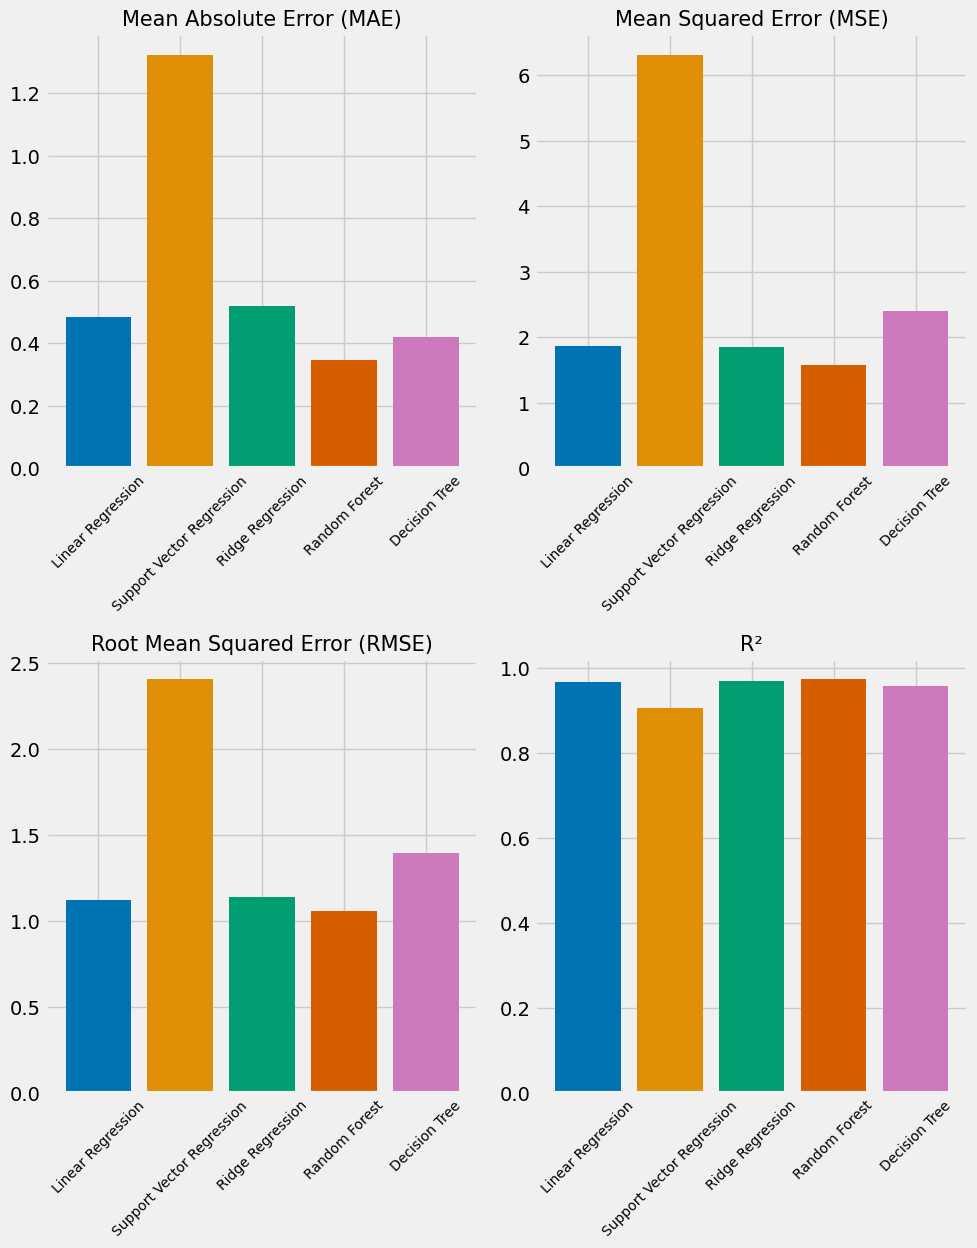

In [ ]:
# Setting color palette
palette = sns.color_palette("colorblind")
# Plot MAE
plt.figure(figsize=(10,30))
plt.subplot(5,2,1)
plt.bar(results['Model'], results['MAE'], color=palette)
plt.title('Mean Absolute Error (MAE)', size=15)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=10)

# Plot MSE
plt.subplot(5,2,2)
plt.bar(results['Model'], results['MSE'], color=palette)
plt.title('Mean Squared Error (MSE)', size=15)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=10)

# Plot RMSE
plt.subplot(5, 2, 3)
plt.bar(results['Model'], results['RMSE'], color=palette)
plt.title('Root Mean Squared Error (RMSE)', size=15)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=10)


# Plot R2
plt.subplot(5, 2, 4)
plt.bar(results['Model'], results['R2'], color=palette)
plt.title('R²', size=15)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=10)

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()

## Results

In [ ]:
# RF is best model because it has the lowest MAE, MSE and RMSE
# It also has the highest R squared and Adjusted R squared values,
# which means it exaplins the most variance in the target variable.

In [ ]:
# Best Model ie. Random Forest's weights are saved as a pickle file
# for future predictions

In [ ]:
pickle.dump(rf, open('best_model_rf.pkl', 'wb'))
# Saving model weights

### Code to load the weights

#### pickled_model = pickle.load(open('best_model_rf.pkl', 'rb'))
#### pickled_model.predict(X_test)